<a href="https://colab.research.google.com/github/odavey999/DS-5220-Final-Project/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold


In [ ]:
!pip install -U scikit-learn

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hour.csv to hour.csv


In [ ]:
bikes = pd.read_csv('hour.csv')
bike = bikes.iloc[:, [2,4,5,6,7,8,11,13,16]]
bike

,season,mnth,hr,holiday,weekday,workingday,atemp,windspeed,cnt
0,1,1,0,0,6,0,0.2879,0.0000,16
1,1,1,1,0,6,0,0.2727,0.0000,40
2,1,1,2,0,6,0,0.2727,0.0000,32
3,1,1,3,0,6,0,0.2879,0.0000,13
4,1,1,4,0,6,0,0.2879,0.0000,1
...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,1,1,0.2576,0.1642,119
17375,1,12,20,0,1,1,0.2576,0.1642,89
17376,1,12,21,0,1,1,0.2576,0.1642,90
17377,1,12,22,0,1,1,0.2727,0.1343,61


In [ ]:
correlationMatrix = bike.corr()
print(correlationMatrix)

              season      mnth        hr  ...     atemp  windspeed       cnt
season      1.000000  0.830386 -0.006117  ...  0.319380  -0.149773  0.178056
mnth        0.830386  1.000000 -0.005772  ...  0.208096  -0.135386  0.120638
hr         -0.006117 -0.005772  1.000000  ...  0.133750   0.137252  0.394071
holiday    -0.009585  0.018430  0.000479  ... -0.030973   0.003988 -0.030927
weekday    -0.002335  0.010400 -0.003498  ... -0.008821   0.011502  0.026900
workingday  0.013743 -0.003477  0.002285  ...  0.054667  -0.011830  0.030284
atemp       0.319380  0.208096  0.133750  ...  1.000000  -0.062336  0.400929
windspeed  -0.149773 -0.135386  0.137252  ... -0.062336   1.000000  0.093234
cnt         0.178056  0.120638  0.394071  ...  0.400929   0.093234  1.000000

[9 rows x 9 columns]


In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

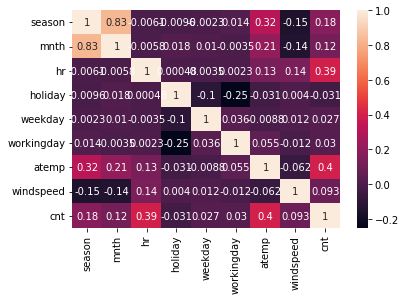

In [ ]:
sn.heatmap(correlationMatrix, annot=True)
plt.show()

In [ ]:
bikes['cnt'].mean()

189.46308763450142

In [ ]:
bikes['high rent'] = (bikes['cnt'] >= bikes['cnt'].mean())*1

In [ ]:
bikes.loc[bikes['high rent'] == 0]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,high rent
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,0
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,0
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,0
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,0


In [ ]:
X = bikes.iloc[:, 2:14]

In [ ]:
Y_num = bikes['cnt']

In [ ]:
Y_bool = bikes['high rent']

In [ ]:
X

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343


In [ ]:
Y_num

0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, Length: 17379, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# with y bool

xb_train, xb_test, yb_train, yb_test = train_test_split(X, Y_bool, test_size = 0.2)

In [ ]:
# with y num

x_train, x_test, yn_train, yn_test = train_test_split(X, Y_num, test_size = 0.2)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import numpy as np
from sklearn import metrics

In [ ]:
x_train.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
count,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000
mean,2.503129,0.503632,6.558009,11.500683,0.028627,3.007265,0.683378,1.422067,0.496399,0.475263,0.627176,0.189965
std,1.107371,0.500005,3.441717,6.938380,0.166762,2.006002,0.465175,0.637017,0.191895,0.171315,0.192724,0.122552
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,4.000000,5.500000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.980000,1.000000,1.000000,0.850700


In [ ]:
rfr = RandomForestRegressor(n_estimators = 20)
rfr.fit(x_train, yn_train)
pred = rfr.predict(x_test)

In [ ]:
pred

array([ 82.05,  70.9 , 155.6 , ...,   7.35, 351.6 ,  36.2 ])

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(yn_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(yn_test, pred))
print('Mean Absolute Percentage Error:', np.mean(np.abs((yn_test - pred) / yn_test)) * 100)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yn_test, pred)))

Mean Absolute Error: 26.332066311852707
Mean Squared Error: 2067.968881741665
Mean Absolute Percentage Error: 29.92479869327223
Root Mean Squared Error: 45.47492585746199


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:
rfc = RandomForestClassifier(n_estimators = 20)
rfc_model = rfc.fit(xb_train, yb_train)
yb_pred = rfc.predict(xb_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(yb_test,yb_pred))
print(classification_report(yb_test,yb_pred))
print(accuracy_score(yb_test, yb_pred))

[[1965  139]
 [ 144 1228]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2104
           1       0.90      0.90      0.90      1372

    accuracy                           0.92      3476
   macro avg       0.92      0.91      0.91      3476
weighted avg       0.92      0.92      0.92      3476

0.9185845799769851


# Naive Bayes

In [ ]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(xb_train, yb_train).predict(xb_test)
print("Number of mislabeled points out of a total %d points : %d"
       % (xb_test.shape[0], (yb_test != y_pred).sum()))
print(classification_report(yb_test, y_pred))
print(accuracy_score(yb_test, y_pred))

Number of mislabeled points out of a total 3476 points : 723
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      2104
           1       0.75      0.71      0.73      1372

    accuracy                           0.79      3476
   macro avg       0.78      0.78      0.78      3476
weighted avg       0.79      0.79      0.79      3476

0.7920023014959724


#Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=25000,
                     hidden_layer_sizes=(5, 2), random_state=1)
nn.fit(xb_train, yb_train)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=25000,
              random_state=1, solver='lbfgs')

In [ ]:
yb_pred = nn.predict(x_test)
print(confusion_matrix(yb_test,yb_pred))
print(classification_report(yb_test,yb_pred))
print(accuracy_score(yb_test, yb_pred))

[[ 995 1109]
 [ 703  669]]
              precision    recall  f1-score   support

           0       0.59      0.47      0.52      2104
           1       0.38      0.49      0.42      1372

    accuracy                           0.48      3476
   macro avg       0.48      0.48      0.47      3476
weighted avg       0.50      0.48      0.48      3476

0.47871116225546606


#Log Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(xb_train, yb_train)
y_pred = clf.predict(xb_test)
print(confusion_matrix(yb_test,y_pred))
print(classification_report(yb_test,y_pred))
print(accuracy_score(yb_test, y_pred))


[[1784  320]
 [ 479  893]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      2104
           1       0.74      0.65      0.69      1372

    accuracy                           0.77      3476
   macro avg       0.76      0.75      0.75      3476
weighted avg       0.77      0.77      0.77      3476

0.770138089758343


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Ridge Regression

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

rr = Ridge(alpha=0.01)
rr.fit(x_train, yn_train)
pred_rr_train = rr.predict(x_train)
print(np.sqrt(mean_squared_error(yn_train, pred_rr_train)))
print(r2_score(yn_train, pred_rr_train))

pred_rr_test = rr.predict(x_test)
print(np.sqrt(mean_squared_error(yn_test, pred_rr_test)))
print(r2_score(yn_test, pred_rr_test))

142.48566503924397
0.3857103042137946
139.05841038620048
0.40129488849527084


K-Fold

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc_model, x_train, yn_train, scoring = 'r2')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


In [ ]:
def get_score(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  return model.score(X_test, y_test)

from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5)

scores_lr = []
scores_rr = []
scores_rfc = []
scores_nb = []
for train_index, test_index in kf.split(X):
  X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y_num[train_index], Y_num[test_index]

  scores_lr.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
  scores_rr.append(get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test))
  scores_rfc.append(get_score(Ridge(), X_train, X_test, y_train, y_test))
  scores_nb.append(get_score(GaussianNB(), X_train, X_test, y_train, y_test))

NameError: ignored